## PART I - Linear Regression with the Covid-19 data 
## (including the stock prices for the year 2020)

In [65]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Read the csv file
df = pd.read_csv("DJI.csv",index_col='Date',parse_dates=True)

# Create sub-dataframe 
df = df[['Open',  'High',  'Low',  'Adj Close', 'Volume']]

# Calculate change 
df['HL_PCT'] = (df['High'] - df['Low']) / df['Adj Close'] * 100.0
df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0


df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]
forecast_col = 'Adj Close'

# Replace the NA with value
df.fillna(value=-99999, inplace=True)

# Smallest integer not less than 0.01 * len(df)
forecast_out = int(math.ceil(0.01 * len(df)))

# Shift the forecast_col by the forecast_out value
df['label'] = df[forecast_col].shift(-forecast_out)

df

,Adj Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2010-01-04,10583.959961,1.646636,1.469409,179780000,10038.379883
2010-01-05,10572.019531,0.586832,-0.118475,188540000,10144.190430
2010-01-06,10573.679688,0.458123,0.084810,186040000,10099.139648
2010-01-07,10606.860352,1.010291,0.338186,217390000,10268.809570
2010-01-08,10618.190430,0.612819,0.111160,172710000,10309.240234
...,...,...,...,...,...
2020-04-27,24133.779297,1.520860,1.121374,389390000,NaN
2020-04-28,24101.550781,1.995892,-1.049462,400250000,NaN
2020-04-29,24633.859375,1.261594,0.585905,455290000,NaN


In [66]:
X = np.array(df.drop(['label'], 1))

# Preprocess the predictors
# X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

# Store the dependent data in y
y = np.array(df['label'])
y_true = y[-forecast_out:]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
# Create a Linear Regression Model
clf = LinearRegression(n_jobs=-1)

# Train the model
clf.fit(X_train, y_train)

# Predict the confidence
confidence = clf.score(X_test, y_test)
print(confidence)

0.9649069942492587


In [68]:
# Store the predicted values 
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

print("r2_score:" , r2_score(y_true, forecast_set))

forecast_errors = [y_true[i]-forecast_set[i] for i in range(len(y_true))]
# print('Forecast Errors: %s' % forecast_errors)
mean_forecast_error = np.mean(forecast_errors)
print('mean forecast Errors: %s' % mean_forecast_error)

bias = sum(forecast_errors) * 1.0/len(y_true)
print('Bias: %f' % bias)

mse = mean_squared_error(forecast_set, y_true)
print('MSE: %f' % mse)

[22774.2098229  21967.69630996 22492.19402202 22206.89996689
 21239.62874342 21593.50590286 21292.96232352 22849.80888027
 23035.79048234 23533.00703269 23892.25297733 23526.72623333
 24027.85772605 23617.58685912 23655.12518961 24322.91746801
 23797.17756916 23205.88620633 23511.92975841 23591.2571207
 23815.07315699 24151.32788905 24197.78539274 24681.77810112
 24473.43132957 23858.85047229] 0.9649069942492587 26
r2_score: 0.969069960228418
mean forecast Errors: -153.21119825678355
Bias: -153.211198
MSE: 31983.498993


In [48]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [49]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [50]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

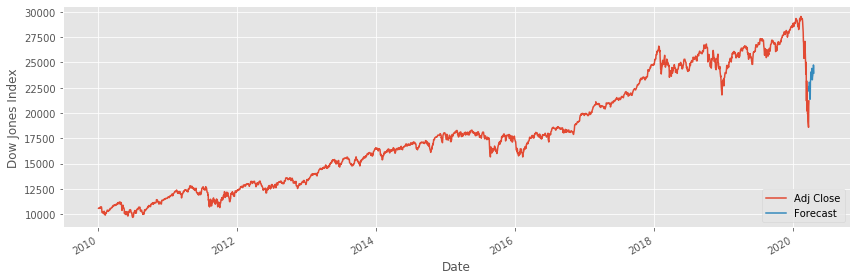

In [56]:
df['Adj Close'].plot(figsize=(12,4))
df['Forecast'].plot(figsize=(12,4))

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Dow Jones Index')
plt.tight_layout()
plt.show()

## PART II - Linear Regression without the Covid-19 data 
## (excluding the stock prices for the year 2020)

In [69]:
# Read the csv file
df = pd.read_csv("DJI.csv", parse_dates=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
3,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
4,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...,...
2595,2020-04-27,23866.150391,24207.650391,23840.609375,24133.779297,24133.779297,389390000
2596,2020-04-28,24357.169922,24512.240234,24031.199219,24101.550781,24101.550781,400250000
2597,2020-04-29,24490.369141,24764.769531,24453.990234,24633.859375,24633.859375,455290000
2598,2020-04-30,24585.570313,24585.570313,24186.900391,24345.720703,24345.720703,487840000


In [70]:
# Convert the datatype of Date
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
# Define the start and end date to exclude the 2020 data
start_date = '2010-01-04'
end_date = '2019-12-31'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)

In [72]:
# Get the data for date range
df = df.loc[mask]
df = df.set_index(df['Date'])
print(df.index)

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-19',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=2515, freq=None)


In [73]:
# Create sub-dataframe 
df = df[['Open',  'High',  'Low',  'Adj Close', 'Volume']]

# Calculate percent change
df['HL_PCT'] = (df['High'] - df['Low']) / df['Adj Close'] * 100.0
df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0

df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]
forecast_col = 'Adj Close'

df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

df

,Adj Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2010-01-05,10572.019531,0.586832,-0.118475,188540000,10144.190430
2010-01-06,10573.679688,0.458123,0.084810,186040000,10099.139648
2010-01-07,10606.860352,1.010291,0.338186,217390000,10268.809570
2010-01-08,10618.190430,0.612819,0.111160,172710000,10309.240234
2010-01-11,10663.990234,0.793705,0.411294,182050000,10392.900391
...,...,...,...,...,...
2019-12-24,28515.449219,0.258070,-0.199916,86150000,NaN
2019-12-26,28621.390625,0.310779,0.287075,155970000,NaN
2019-12-27,28645.259766,0.323543,-0.104899,182280000,NaN


In [74]:
X = np.array(df.drop(['label'], 1))

# Preprocess the predictors
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Store the dependent data in y
df.dropna(inplace=True)

# Split the data in training and testing
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [75]:
# Create a Linear Regression Model
clf = LinearRegression(n_jobs=-1)

# Train the model
clf.fit(X_train, y_train)

# Predict the confidence
confidence = clf.score(X_test, y_test)
print(confidence)

0.9851899398962092


In [76]:
# Store the predicted values 
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[28010.51086203 28200.56365274 28288.57923275 28294.15666815
 28161.64791958 28014.9973198  27677.81495223 27789.24487158
 27836.52744915 28144.63201182 28060.01315096 28029.08685335
 28045.61895524 28298.43367623 28309.18412043 28396.88168351
 28421.62468339 28405.30252031 28514.58532999 28750.52567066
 28679.77478752 28613.44153328 28723.94648549 28773.36192309
 28637.85337825 28660.60171881] 0.9851899398962092 26


In [77]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [78]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

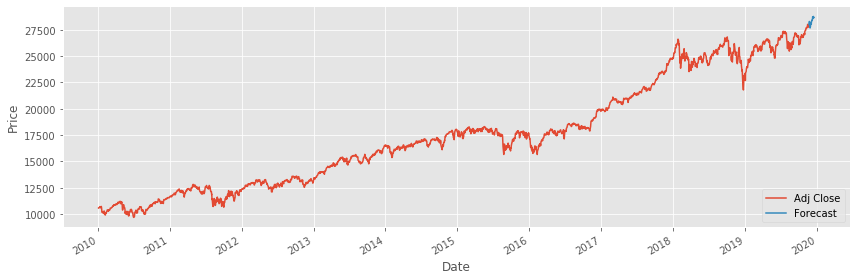

In [80]:
df['Adj Close'].plot(figsize=(12,4))
df['Forecast'].plot(figsize=(12,4))

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()